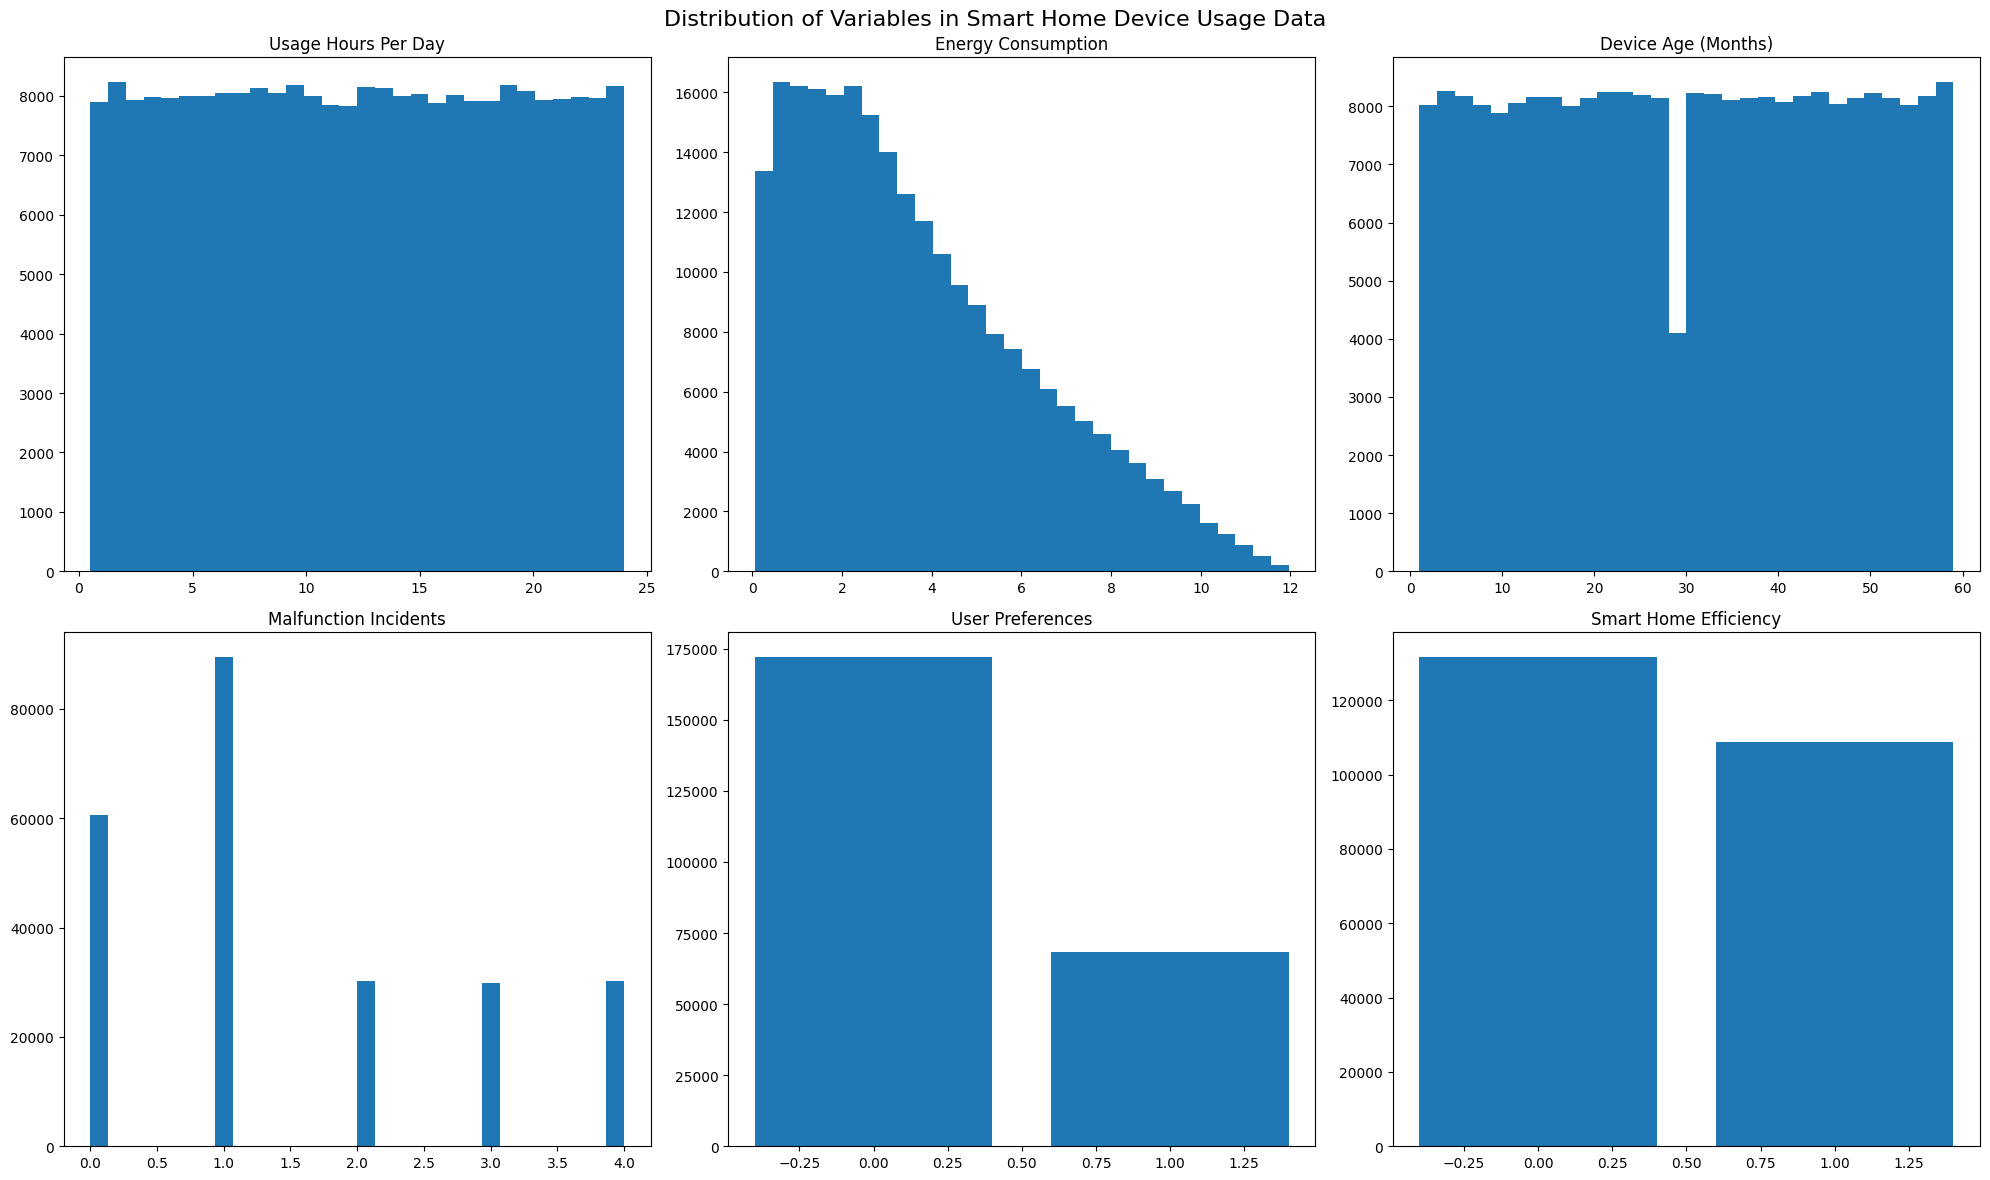

             user_id    usage_hours  energy_consumption  user_preferences  \
count  240403.000000  240403.000000       240403.000000     240403.000000   
mean   124586.429479      12.247328            3.705849          0.284015   
std     73664.344401       6.785530            2.615658          0.450945   
min         1.000000       0.500108            0.053864          0.000000   
25%     60101.500000       6.383283            1.593516          0.000000   
50%    120202.000000      12.257052            3.134257          0.000000   
75%    190302.500000      18.131056            5.381071          1.000000   
max    250403.000000      23.999990           11.962264          1.000000   

       malfunction_incidents     device_age  smart_home_efficiency  
count          240403.000000  240403.000000          240403.000000  
mean                1.499582      30.068377               0.452274  
std                 1.325432      17.025516               0.497718  
min                 0.000000  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the actual dataset
df = pd.read_csv('/content/drive/MyDrive/hackathon/combined_data.csv')

# Remove rows where device_types column contains "Smart Thermostat"
actual_df = df[df['device_type'] != 'Smart Thermostat']

# Create subplots for numerical variables
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Variables in Smart Home Device Usage Data', fontsize=16)

# Plot histograms for numerical variables
axs[0, 0].hist(actual_df['usage_hours'], bins=30)
axs[0, 0].set_title('Usage Hours Per Day')
axs[0, 1].hist(actual_df['energy_consumption'], bins=30)
axs[0, 1].set_title('Energy Consumption')
axs[0, 2].hist(actual_df['device_age'], bins=30)
axs[0, 2].set_title('Device Age (Months)')
axs[1, 0].hist(actual_df['malfunction_incidents'], bins=30)
axs[1, 0].set_title('Malfunction Incidents')

# Plot bar charts for categorical variables
axs[1, 1].bar(actual_df['user_preferences'].value_counts().index, actual_df['user_preferences'].value_counts().values)
axs[1, 1].set_title('User Preferences')
axs[1, 2].bar(actual_df['smart_home_efficiency'].value_counts().index, actual_df['smart_home_efficiency'].value_counts().values)
axs[1, 2].set_title('Smart Home Efficiency')
plt.tight_layout()
plt.savefig('variable_distributions.png')
plt.show()

# Display summary statistics
print(actual_df.describe())
# Display unique device types and their counts
print("\\nDevice Type Distribution:")
print(actual_df['device_type'].value_counts())


In [3]:
df = actual_df

# Check the number of distinct device types
num_device_types = df['device_type'].nunique()
print(f"Number of distinct device types: {num_device_types}")

# Check the range of usage hours
min_usage = df['usage_hours'].min()
max_usage = df['usage_hours'].max()
print(f"Usage hours range: {min_usage:.2f} to {max_usage:.2f}")

# Check the range of energy consumption
min_energy = df['energy_consumption'].min()
max_energy = df['energy_consumption'].max()
print(f"Energy consumption range: {min_energy:.2f} to {max_energy:.2f}")

# Check user preferences
user_pref_values = df['user_preferences'].unique()
print(f"User preference values: {user_pref_values}")

# Check device age range
min_age = df['device_age'].min()
max_age = df['device_age'].max()
print(f"Device age range: {min_age} to {max_age} months")

# Check malfunction incidents range
min_incidents = df['malfunction_incidents'].min()
max_incidents = df['malfunction_incidents'].max()
print(f"Malfunction incidents range: {min_incidents} to {max_incidents}")

# Check smart home efficiency values
efficiency_values = df['smart_home_efficiency'].unique()
print(f"Smart home efficiency values: {efficiency_values}")

# Relationships between variables
print("\
Checking relationships between variables:")

# Energy consumption vs usage hours
corr_usage_energy = df['usage_hours'].corr(df['energy_consumption'])
print(f"Correlation between usage hours and energy consumption: {corr_usage_energy:.2f}")

# User preference vs energy consumption
high_pref_avg_energy = df[df['user_preferences'] == 1]['energy_consumption'].mean()
low_pref_avg_energy = df[df['user_preferences'] == 0]['energy_consumption'].mean()
print(f"Average energy consumption for high preference: {high_pref_avg_energy:.2f}")
print(f"Average energy consumption for low preference: {low_pref_avg_energy:.2f}")

# Device age vs energy consumption
corr_age_energy = df['device_age'].corr(df['energy_consumption'])
print(f"Correlation between device age and energy consumption: {corr_age_energy:.2f}")

# Device age vs malfunction incidents
corr_age_incidents = df['device_age'].corr(df['malfunction_incidents'])
print(f"Correlation between device age and malfunction incidents: {corr_age_incidents:.2f}")

# Checking smart home efficiency logic
efficiency_check = df[
    ((df['energy_consumption'] < 5) & (df['malfunction_incidents'] < 2) & (df['smart_home_efficiency'] == 1)) |
    ((df['energy_consumption'] >= 5) | (df['malfunction_incidents'] >= 2) & (df['smart_home_efficiency'] == 0))
]
efficiency_accuracy = len(efficiency_check) / len(df) * 100
print(f"\
Percentage of records following the smart home efficiency logic: {efficiency_accuracy:.2f}%")

# Sample of 5 rows
print("\
Sample of 5 rows from the dataset:")
print(df.sample(5).to_string(index=False))

Number of distinct device types: 47
Usage hours range: 0.50 to 24.00
Energy consumption range: 0.05 to 11.96
User preference values: [0 1]
Device age range: 1 to 59 months
Malfunction incidents range: 0 to 4
Smart home efficiency values: [0 1]
Checking relationships between variables:
Correlation between usage hours and energy consumption: 0.76
Average energy consumption for high preference: 7.09
Average energy consumption for low preference: 2.36
Correlation between device age and energy consumption: -0.00
Correlation between device age and malfunction incidents: 0.64
Percentage of records following the smart home efficiency logic: 99.50%
Sample of 5 rows from the dataset:
 user_id      device_type  usage_hours  energy_consumption  user_preferences  malfunction_incidents  device_age  smart_home_efficiency
    1529           Lights     2.022961            0.711105                 0                      0          19                      1
  110832  Smart Sprinkler    15.881702         

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Apply one-hot encoding for device_type feature
df_encoded = pd.get_dummies(df, columns=['device_type'])

# Defining the target variable
X = df_encoded.drop(['smart_home_efficiency', 'user_id'], axis=1)
y = df_encoded['smart_home_efficiency']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Feature names:", X.columns.tolist())

Data preprocessing completed.
Shape of X_train: (192322, 52)
Shape of X_test: (48081, 52)
Feature names: ['usage_hours', 'energy_consumption', 'user_preferences', 'malfunction_incidents', 'device_age', 'device_type_Camera', 'device_type_Lights', 'device_type_Security System', 'device_type_Smart Air Conditioner', 'device_type_Smart Air Purifier', 'device_type_Smart Alarm System', 'device_type_Smart Bed', 'device_type_Smart Blender', 'device_type_Smart Carbon Monoxide Detector', 'device_type_Smart Coffee Maker', 'device_type_Smart Dehumidifier', 'device_type_Smart Dishwasher', 'device_type_Smart Door Lock', 'device_type_Smart Doorbell', 'device_type_Smart Dryer', 'device_type_Smart Fan', 'device_type_Smart Faucet', 'device_type_Smart Garage Door Opener', 'device_type_Smart Heater', 'device_type_Smart Humidifier', 'device_type_Smart Kettle', 'device_type_Smart Leak Sensor', 'device_type_Smart Light Bulb', 'device_type_Smart Light Switch', 'device_type_Smart Lock', 'device_type_Smart Micro

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the classifiers
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

In [6]:
# Train and evaluate Logistic Regression
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Report: \n", log_reg_report)

Logistic Regression Accuracy: 0.9878538299952164
Logistic Regression Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     26642
           1       0.99      0.98      0.99     21439

    accuracy                           0.99     48081
   macro avg       0.99      0.99      0.99     48081
weighted avg       0.99      0.99      0.99     48081



In [7]:
# Train and evaluate Random Forest
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Report:\n", rf_report)

Random Forest Accuracy: 0.9966722821904702
Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26642
           1       1.00      1.00      1.00     21439

    accuracy                           1.00     48081
   macro avg       1.00      1.00      1.00     48081
weighted avg       1.00      1.00      1.00     48081



In [8]:
# Train and evaluate SVM
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", svm_accuracy)
print("SVM Report:\n", svm_report)

SVM Accuracy: 0.9913479336952227
SVM Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     26642
           1       0.99      0.99      0.99     21439

    accuracy                           0.99     48081
   macro avg       0.99      0.99      0.99     48081
weighted avg       0.99      0.99      0.99     48081



In [13]:
# Train and evaluate SVM
svm_clf.set_params(probability=True)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", svm_accuracy)
print("SVM Report:\n", svm_report)

SVM Accuracy: 0.9913479336952227
SVM Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     26642
           1       0.99      0.99      0.99     21439

    accuracy                           0.99     48081
   macro avg       0.99      0.99      0.99     48081
weighted avg       0.99      0.99      0.99     48081



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import time

# Initializing additional classifiers
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()
nb_clf = GaussianNB()
gb_clf = GradientBoostingClassifier(random_state=42)

# List of classifiers
classifiers = [
    ('Decision Tree', dt_clf),
    ('K-Nearest Neighbors', knn_clf),
    ('Naive Bayes', nb_clf),
    ('Gradient Boosting', gb_clf)
]

# Training and evaluating classifiers
results = []

for name, clf in classifiers:
    start_time = time.time()
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    train_time = time.time() - start_time

    results.append({
        'name': name,
        'accuracy': accuracy,
        'train_time': train_time,
        'classification_report': classification_report(y_test, y_pred)
    })


In [11]:
for result in results:
    print(f"\n{result['name']}:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Training Time: {result['train_time']:.2f} seconds")
    print("Classification Report:")
    print(result['classification_report'])

print("Classification analysis completed.")


Decision Tree:
Accuracy: 0.9947
Training Time: 2.67 seconds
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26642
           1       0.99      0.99      0.99     21439

    accuracy                           0.99     48081
   macro avg       0.99      0.99      0.99     48081
weighted avg       0.99      0.99      0.99     48081


K-Nearest Neighbors:
Accuracy: 0.9946
Training Time: 84.92 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26642
           1       0.99      0.99      0.99     21439

    accuracy                           0.99     48081
   macro avg       0.99      0.99      0.99     48081
weighted avg       0.99      0.99      0.99     48081


Naive Bayes:
Accuracy: 0.9546
Training Time: 0.27 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94 

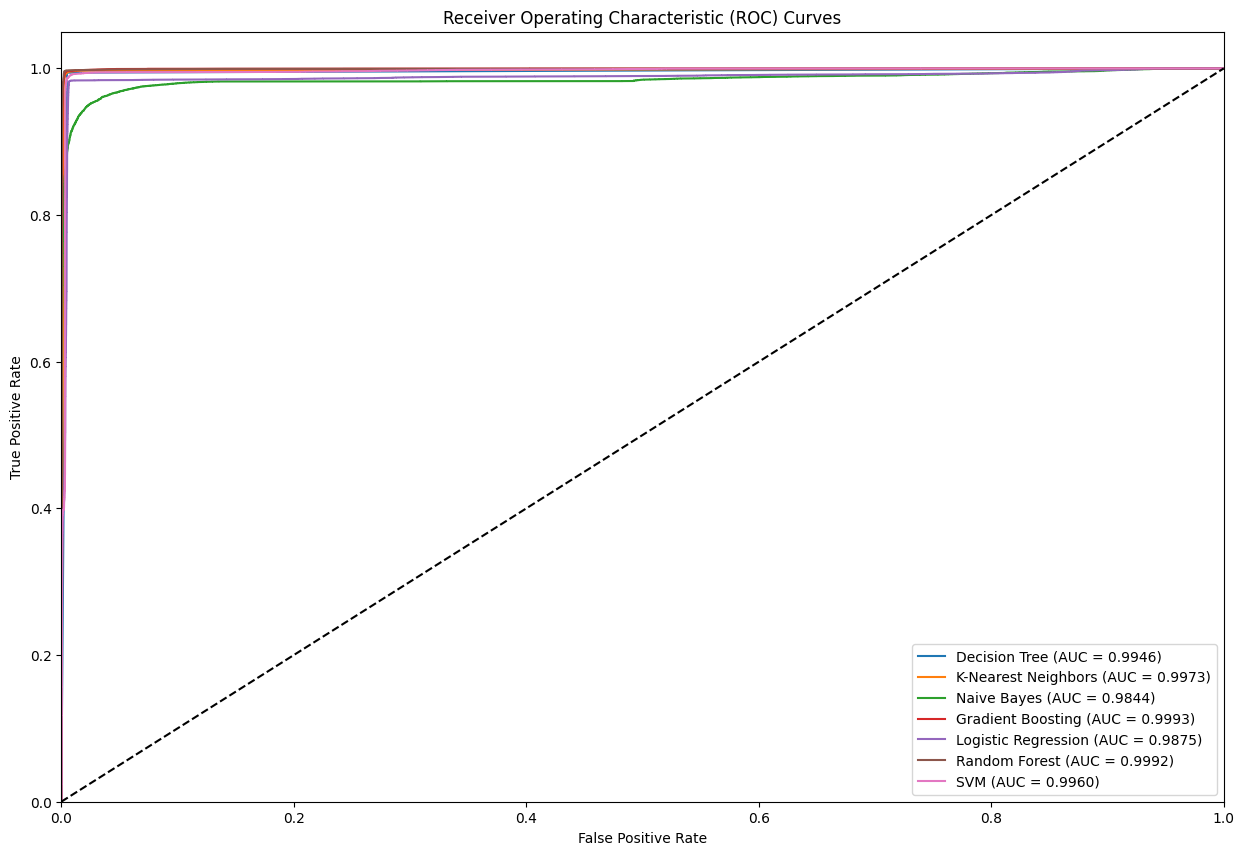

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Plotting ROC curves
plt.figure(figsize=(15, 10))

for name, clf in classifiers:
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')


models = [
    ('Logistic Regression', log_reg),
    ('Random Forest', rf_clf),
    ('SVM', svm_clf)
]

for name, clf in models:
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()